In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib as mpl
import plotly as pl
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import pygal
from pygal.maps.world import COUNTRIES
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [59]:
data = pd.read_csv('mmALL_073120_csv.csv')
px.treemap(data, path=['region', 'year'], values='protest')

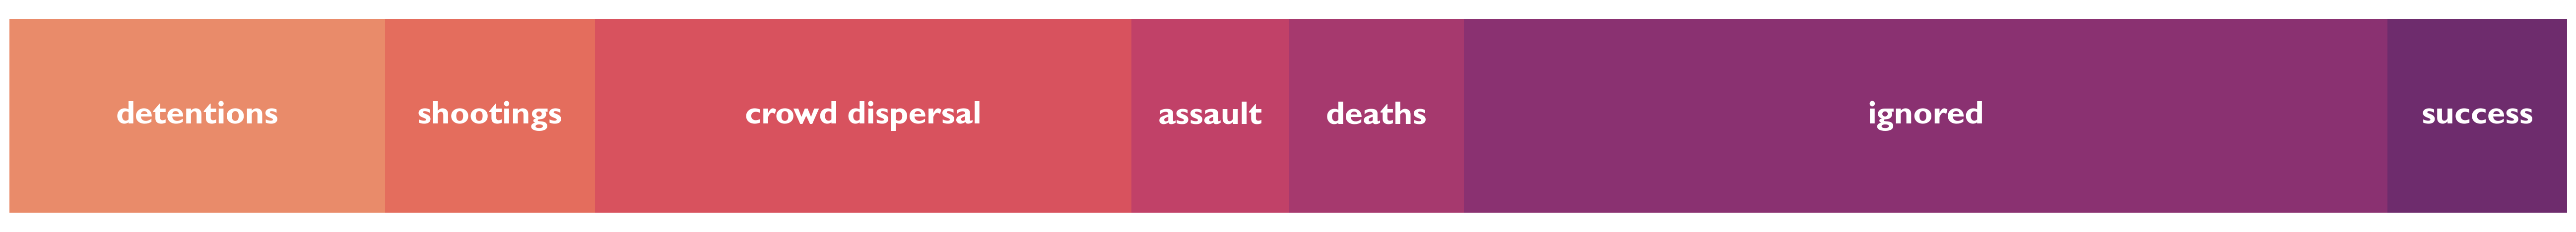

In [43]:
category_names2 = ['detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths', 'ignored', 'success']
results2 = {'': [2149, 1200, 3072, 900, 1000, 5285, 1027]}


def survey2(results, category_names):
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('flare')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 3), dpi=190)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=25, fontweight='bold', fontname='Gill Sans MT')
    ax.axis('off')
    return fig, ax

survey2(results2, category_names2)
plt.show()

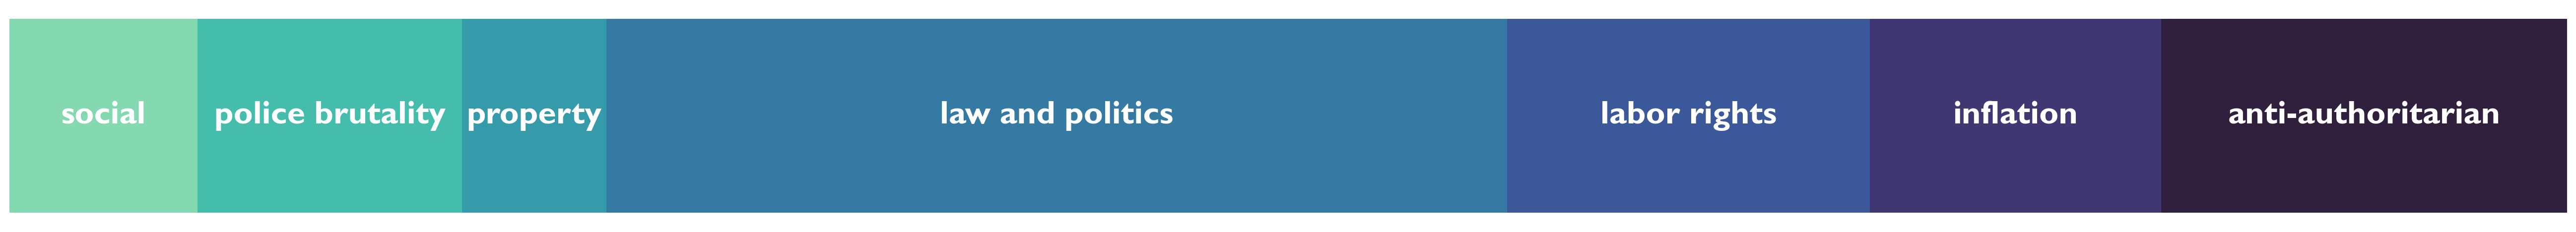

In [44]:
category_names2 = ['social', 'police brutality', 'property', 'law and politics', 'labor rights', 'inflation', 'anti-authoritarian']
results2 = {'': [784, 1101, 602, 3750, 1511, 1214, 1689]}

def survey2(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('mako_r')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(35, 3), dpi=190)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, 
category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, category_names[i], ha='center', va='center',
                    color=text_color, fontsize=25, fontweight='bold', fontname='Gill Sans MT')

    ax.axis('off')
    return fig, ax


survey2(results2, category_names2)
plt.show()

In [63]:
data = pd.read_csv('main_data.csv')
MM = data[['country','reasons_social', 'reasons_policebrutality',
       'reasons_other', 'reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal', 'responses_accomodation',
       'responses_arrests', 'responses_shootings', 'responses_other',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']].groupby(['country']).sum().reset_index()
abc = MM.corr()
new = abc[['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor',
       'reasons_price', 'reasons_removal']].loc[['responses_accomodation',
       'responses_arrests', 'responses_shootings',
       'responses_crowd_dispersal', 'responses_beatings', 'responses_killings',
       'responses_ignore']]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'social reforms'),
  Text(0, 1.5, 'police brutality'),
  Text(0, 2.5, 'property'),
  Text(0, 3.5, 'law & politics'),
  Text(0, 4.5, 'labor rights'),
  Text(0, 5.5, 'inflation'),
  Text(0, 6.5, 'anti-authoritarian')])

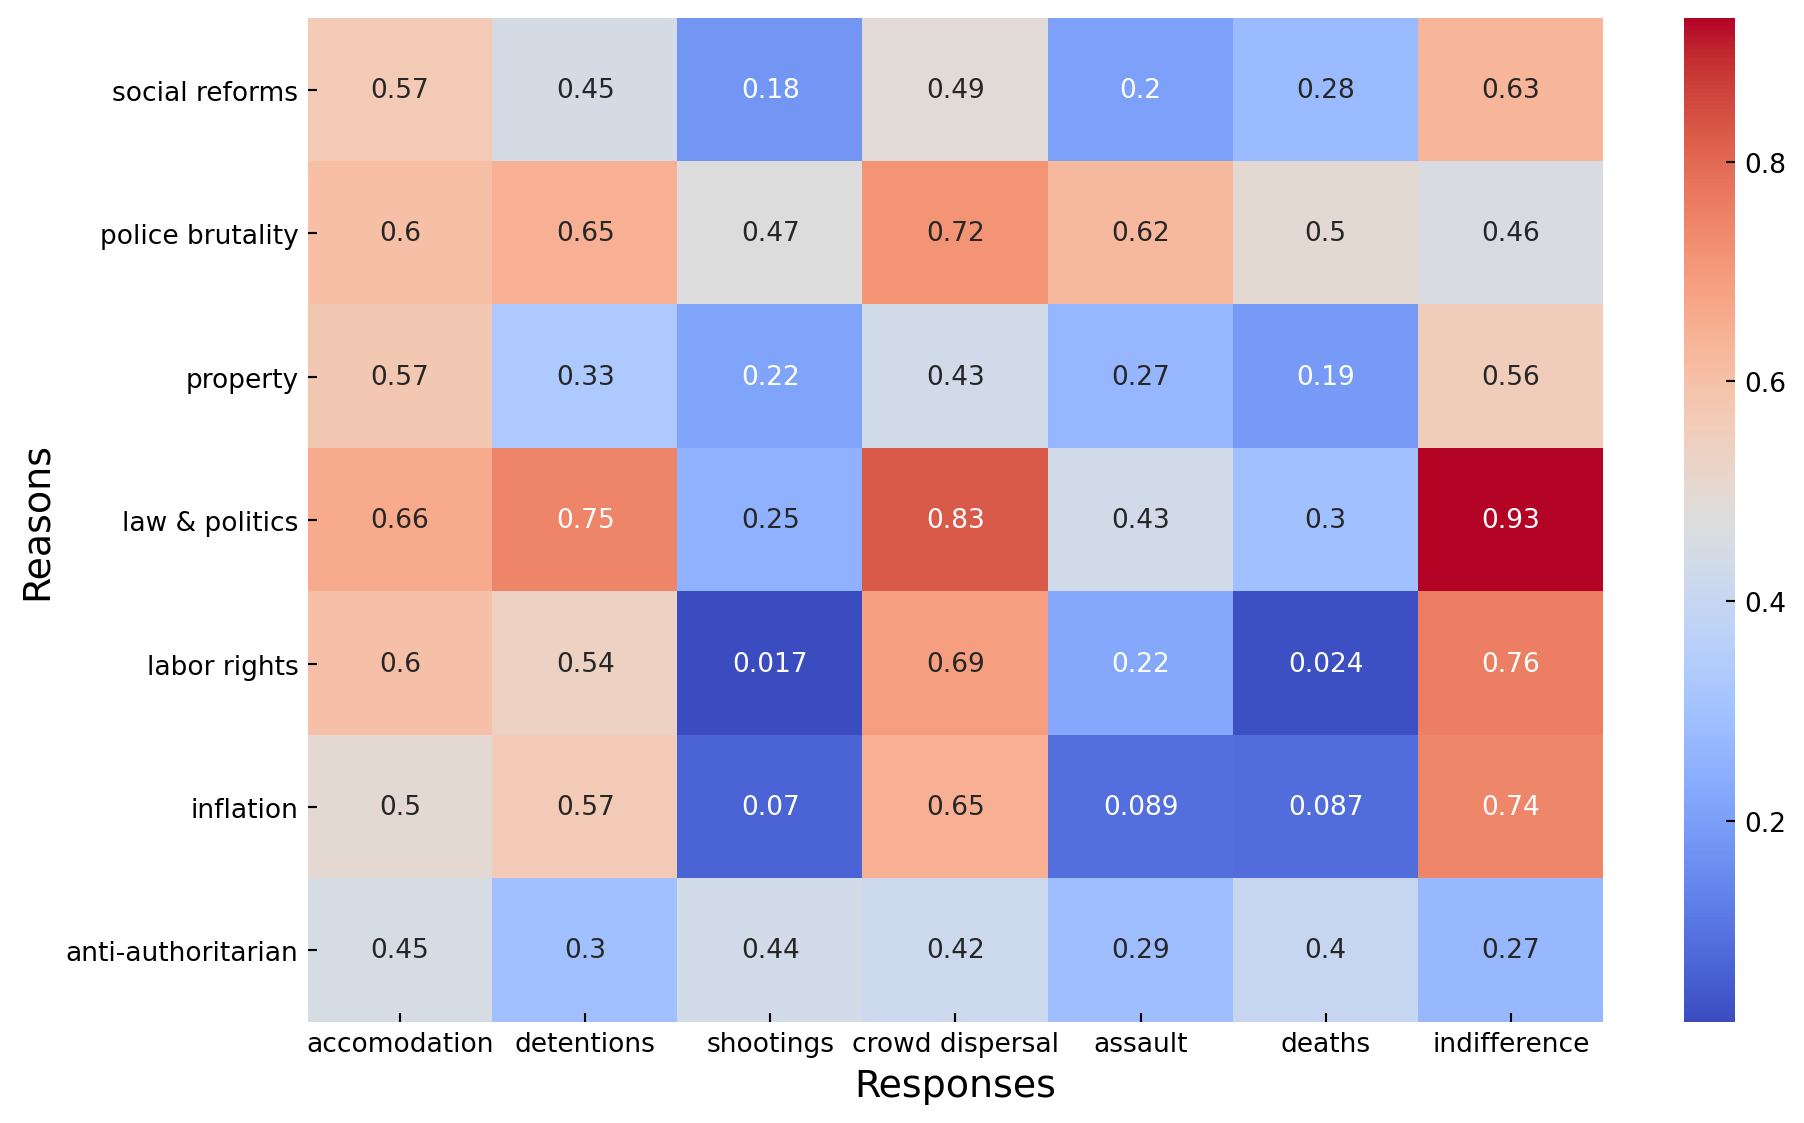

In [46]:
plt.figure(figsize = (11,7), dpi=190)
cmp = sns.color_palette("coolwarm", as_cmap=True)
ax = sns.heatmap(new.T, annot = True, cmap = cmp, cbar=True, xticklabels=['accomodation', 'detentions', 'shootings', 'crowd dispersal', 'assault', 'deaths','indifference'], yticklabels=['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian'])

plt.ylabel('Reasons',fontsize='x-large')
plt.xlabel('Responses',fontsize='x-large')

plt.xticks(fontweight='roman')
plt.yticks(fontweight='roman')

In [47]:
df = data
df = df[['protest', 'protesterviolence', 'reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal',
         'reasons_political', 'reasons_price', 'reasons_policebrutality']]

# Calculates percentage of violent protests for each reason
reasons = ['reasons_labor', 'reasons_social', 'reasons_land', 'reasons_removal', 'reasons_political',
           'reasons_price', 'reasons_policebrutality']
df_temp = pd.DataFrame()
for reason in reasons:
    df_temp[reason] = [round((sum(df['protesterviolence'] & df[reason] > 0))/(sum(df[reason]))*100)]
    
# Reformats and renames the df
df_percentage = df_temp.T
df_percentage.rename(index = {'reasons_social':'social reforms',
                              'reasons_policebrutality':'police brutality',
                              'reasons_land':'property',
                              'reasons_political':'law & politics',
                              'reasons_labor':'labor rights',
                              'reasons_price':'inflation',
                              'reasons_removal':'anti-authoritarian'},
                    columns = {0:'percentage'},
                    inplace = True)
df_per = df_percentage

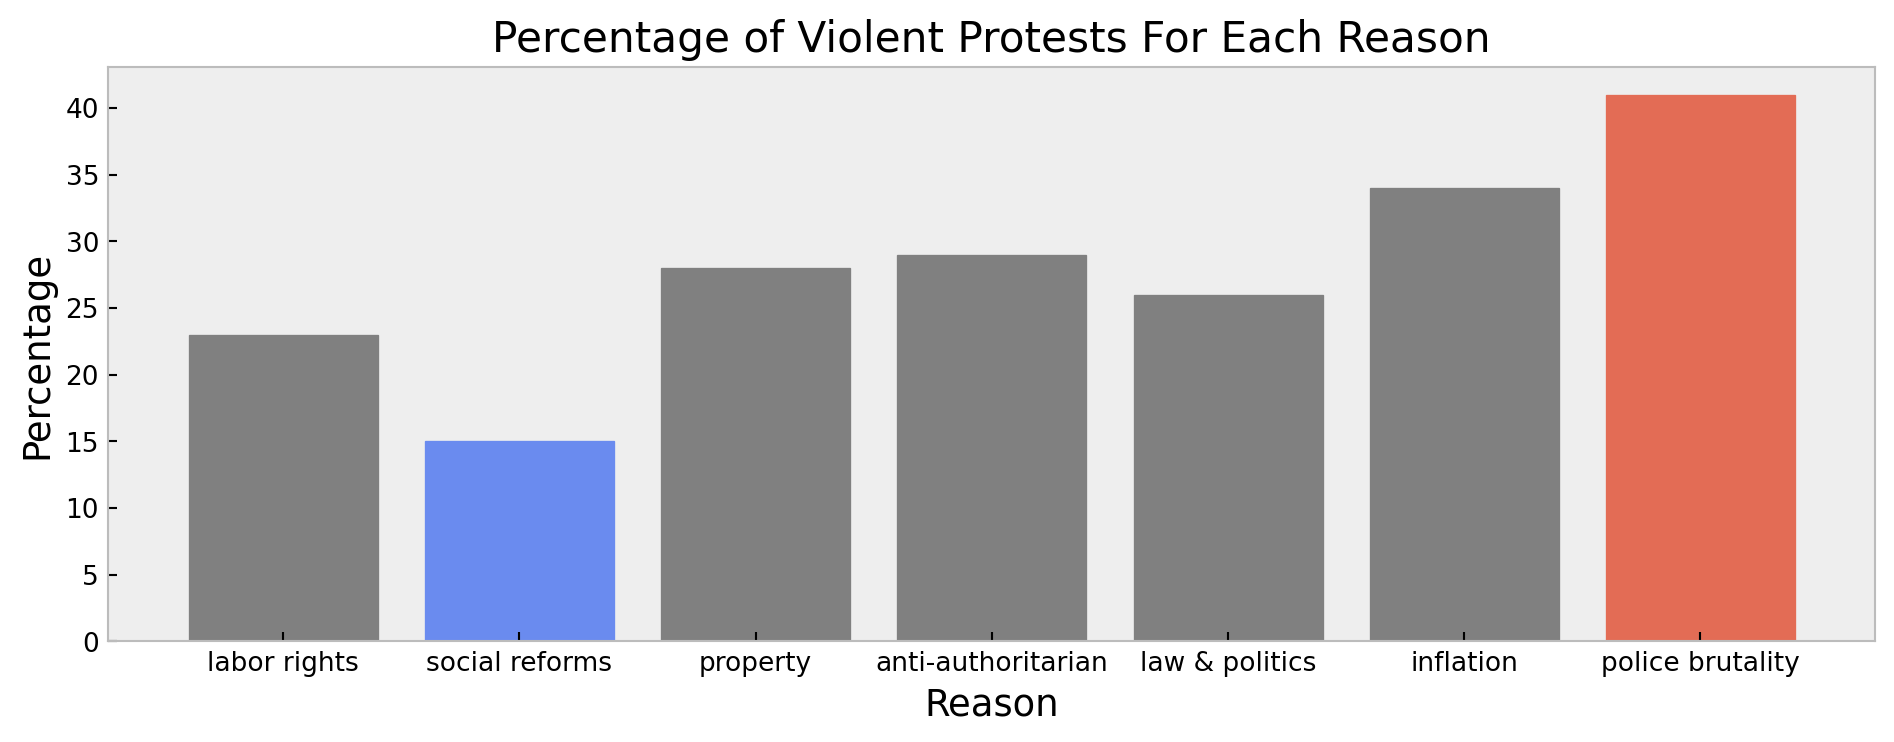

In [50]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims, dpi=190)
mpl.style.use("bmh")
# Plotting
sns.color_palette('coolwarm')
clrs = ['grey' if (x < max(df_per['percentage'])) else '#E36C55' for x in df_per['percentage'] ]

mybar = plt.bar(df_per.index, df_per['percentage'])
for bar in mybar:
    bar.set_color('grey')
mybar[6].set_color('#E36C55')
mybar[1].set_color('#6a8bef')

plt.xlabel('Reason', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Percentage of Violent Protests For Each Reason', size = 16)
plt.grid(False)

Text(0.5, 1.0, 'More than 10 days')

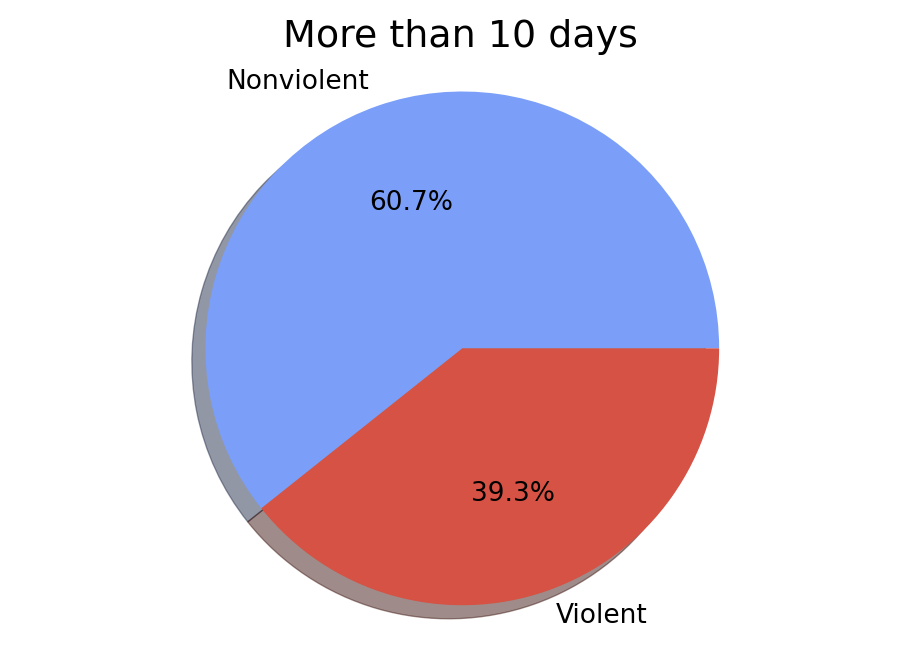

In [49]:
sizes = [60.7, 39.3]
labels = ['Nonviolent', 'Violent']

sns.set_palette("coolwarm")
plt.figure(figsize=(6,4), dpi=190)
col = plt.get_cmap('coolwarm')(np.linspace(.2, .9, len(labels)))
plt.pie(sizes, labels=labels, autopct='%2.1f%%', shadow=True, colors=col)
plt.axis('equal')

plt.title('More than 10 days')

Text(0.5, 1.0, '1 day to 10 days')

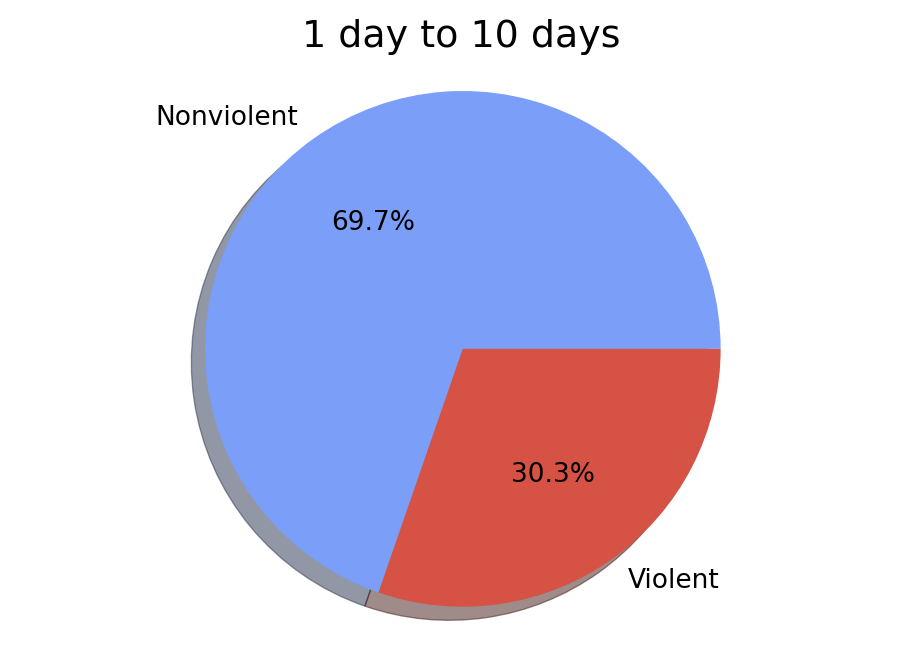

In [13]:
sizes = [69.7, 30.3]

sns.set_palette("coolwarm")
plt.figure(figsize=(6,4), dpi=190)
col = plt.get_cmap('coolwarm')(np.linspace(.2, .9, len(labels)))
plt.pie(sizes, labels=labels, autopct='%2.1f%%', shadow=True, colors=col)
plt.axis('equal')

plt.title('1 day to 10 days')

Text(0.5, 1.0, 'Within 1 day')

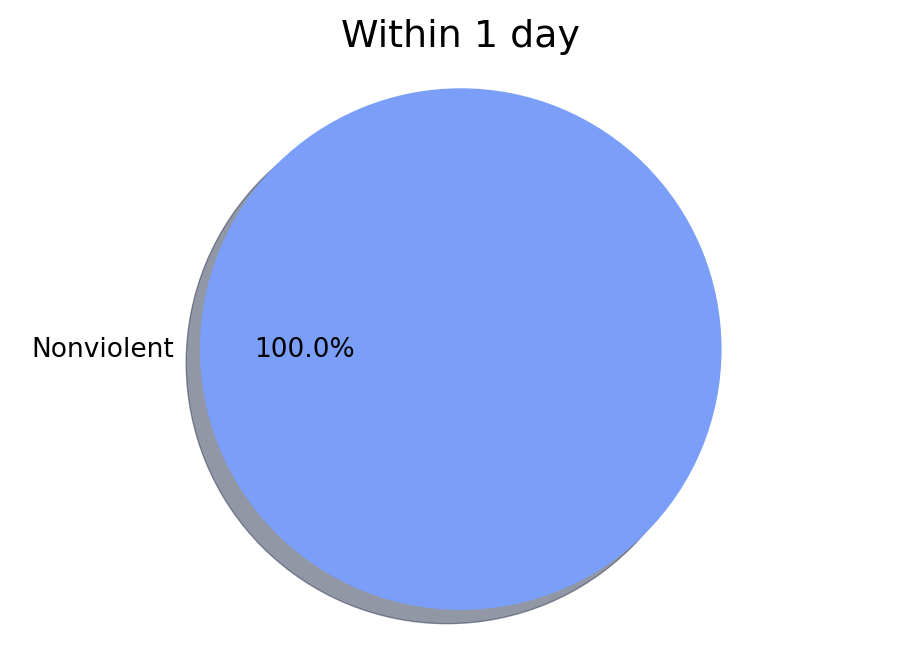

In [14]:
sizes = [100]
labels = ['Nonviolent']

sns.set_palette("coolwarm")
plt.figure(figsize=(6,4), dpi=190)
col = plt.get_cmap('coolwarm')(np.linspace(.2, .9, len(labels)))
plt.pie(sizes, labels=labels, autopct='%2.1f%%', shadow=True, colors=col)
plt.axis('equal')

plt.title('Within 1 day')

In [54]:
tmp = dict()
tmp1 = []
tmp2 = []
for x in range(1,8):
    Idx = data['protest_time']==x
    v_Idx = data['violence_both']>0
    
    if(sum(Idx)==0):
        tmp[x]=0
    else:
        tmp[(x,x+10)]=sum(v_Idx & Idx)/sum(v_Idx)*100
        tmp1.append(sum(v_Idx & Idx)/sum(v_Idx)*100)
        tmp2.append(x)

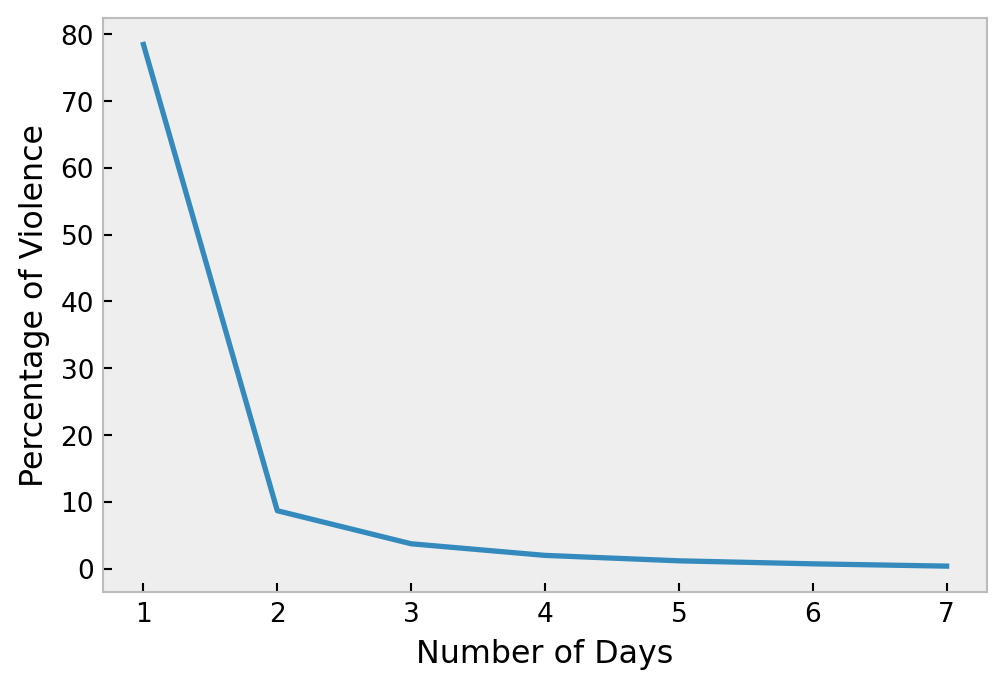

In [56]:
plt.figure(figsize=(6,4),dpi=190)

plt.plot(tmp2, tmp1)
plt.xlabel('Number of Days')
plt.ylabel('Percentage of Violence')
plt.title('')
plt.grid(False)

Text(0.5, 1.0, 'State Responses for Violent Protests')

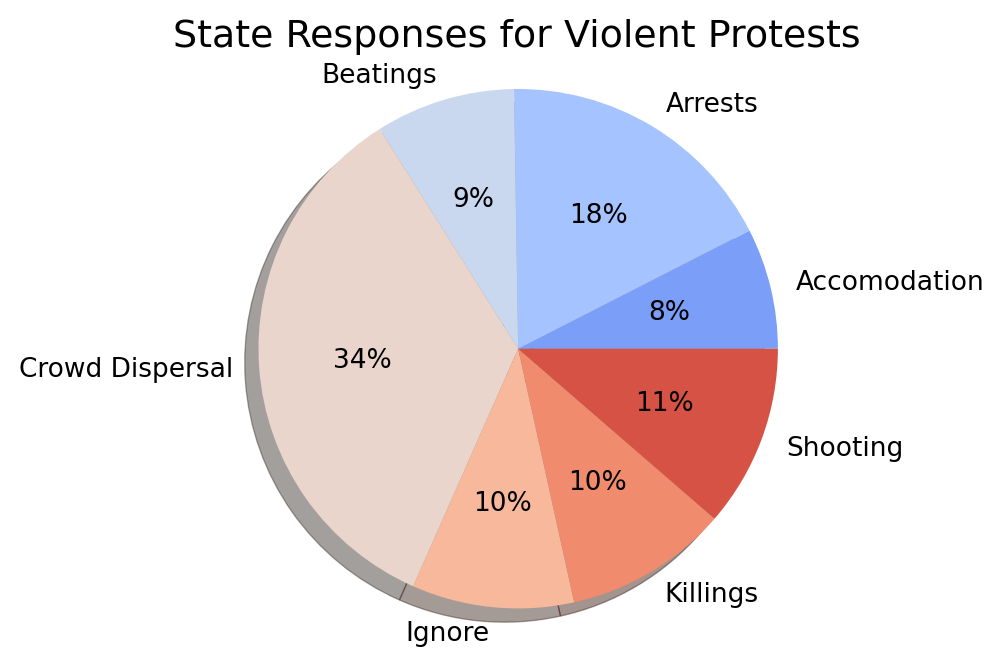

In [57]:
sizes = [433, 1022, 501, 1983, 581, 587, 654]
labels = 'Accomodation', 'Arrests', 'Beatings', 'Crowd Dispersal', 'Ignore', 'Killings', 'Shooting'
col = ['lightblue','brown','lavenderblush', 'teal', 'darksalmon', 'blueviolet']

plt.figure(figsize=(6,4), dpi=190)
col = plt.get_cmap('coolwarm')(np.linspace(.2, .9, len(labels)))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, colors=col)
plt.axis('equal')

plt.title('State Responses for Violent Protests')

Text(0.5, 1.0, 'State Responses for Non-Violent Protests')

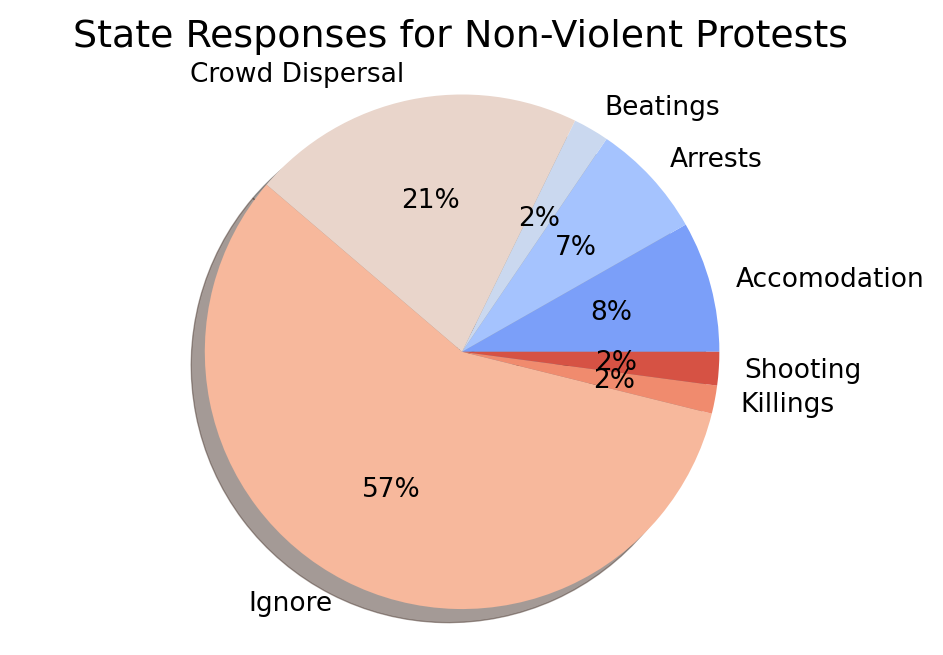

In [58]:
sizes = [1105, 977, 303, 2817, 7705, 237, 282]
labels = 'Accomodation', 'Arrests', 'Beatings', 'Crowd Dispersal', 'Ignore', 'Killings', 'Shooting'

plt.figure(figsize=(6,4), dpi=190)
col = plt.get_cmap('coolwarm')(np.linspace(.2, .9, len(labels)))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True, colors=col)
plt.axis('equal')

plt.title('State Responses for Non-Violent Protests')

In [20]:
data['country'] = data['country'].replace(['United Arab Emirate'], 'United Arab Emirates')
data['country'] = data['country'].replace(['USSR'], 'Russia')
data['country'] = data['country'].replace(['Germany West','Germany East'], 'Germany')
data['country'] = data['country'].replace(['Yugoslavia'], 'Croatia')
data['country'] = data['country'].replace(['Czechoslovakia'], 'Slovakia')
data['country'] = data['country'].replace(['Bosnia'], 'Bosnia and Herzegovina')
data['country'] = data['country'].replace(['Serbia and Montenegro', 'Kosovo'], 'Serbia')
data['country'] = data['country'].replace(['Congo Kinshasa', 'Congo Brazzaville'], 'Congo')
data['country'] = data['country'].replace(['South Sudan', 'North Sudan'], 'Sudan')

In [21]:
tmp = data[['country','protest']].groupby('country').sum().sort_values('protest')

In [22]:
rev_map  = {v:k for k,v in COUNTRIES.items()}

In [23]:
mx_c = []
for x in tmp[-25:].iterrows():
    try:
        mx_c.append(rev_map[x[0]])
    except:
        pass
mx_c.append('us')

In [24]:
mn_c = []
for x in tmp[:25].iterrows():
    try:
        mn_c.append(rev_map[x[0]])
    except:
        pass

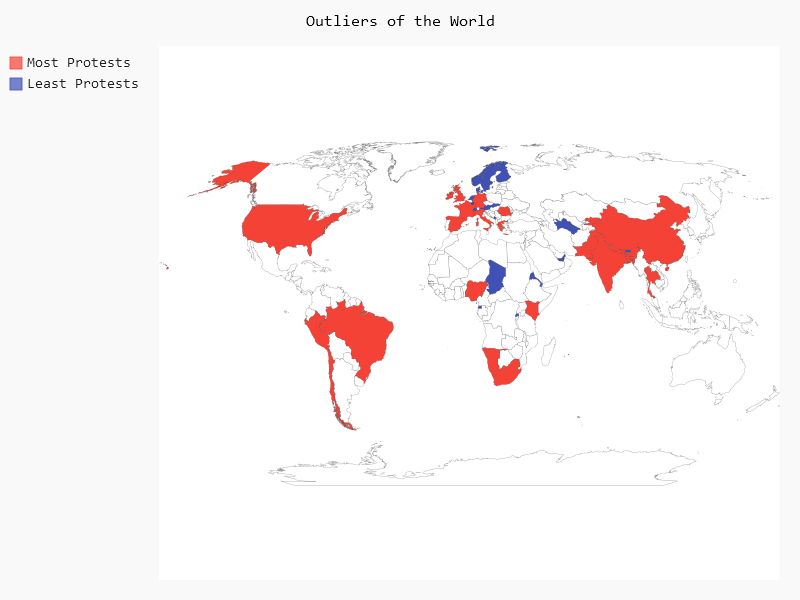

In [25]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Outliers of the World'
worldmap_chart.add('Most Protests', mx_c)
worldmap_chart.add('Least Protests', mn_c)

In [26]:
df = data
df_kenya = df[df['country'] == 'Kenya']
df_kenya_yrs = df_kenya.groupby('year').sum()

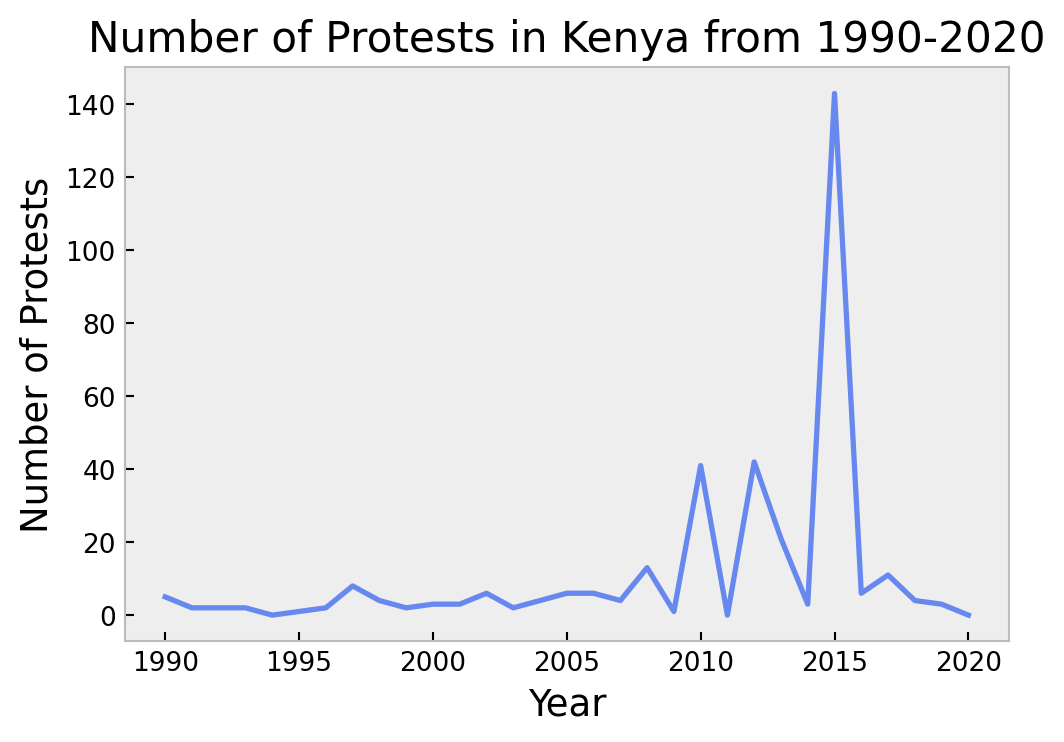

In [27]:
plt.figure(figsize=(6,4), dpi=190)
kenya_line_plt = sns.lineplot(x = 'year', y = 'protest', data = df_kenya_yrs)
plt.title('Number of Protests in Kenya from 1990-2020', size = 16)
plt.ylabel('Number of Protests', size = 14)
plt.xlabel('Year', size = 14)
plt.grid(False)

In [28]:
df_reasons = pd.DataFrame(columns = ['Reason'])
df_reasons['Reason'] = ['labor rights', 'social reforms', 'property', 'anti-authoritarian', 'law & politics', 'inflation', 'police brutality']
df_reasons['Total Protests'] = [42, 4, 35, 17, 58, 13, 20]

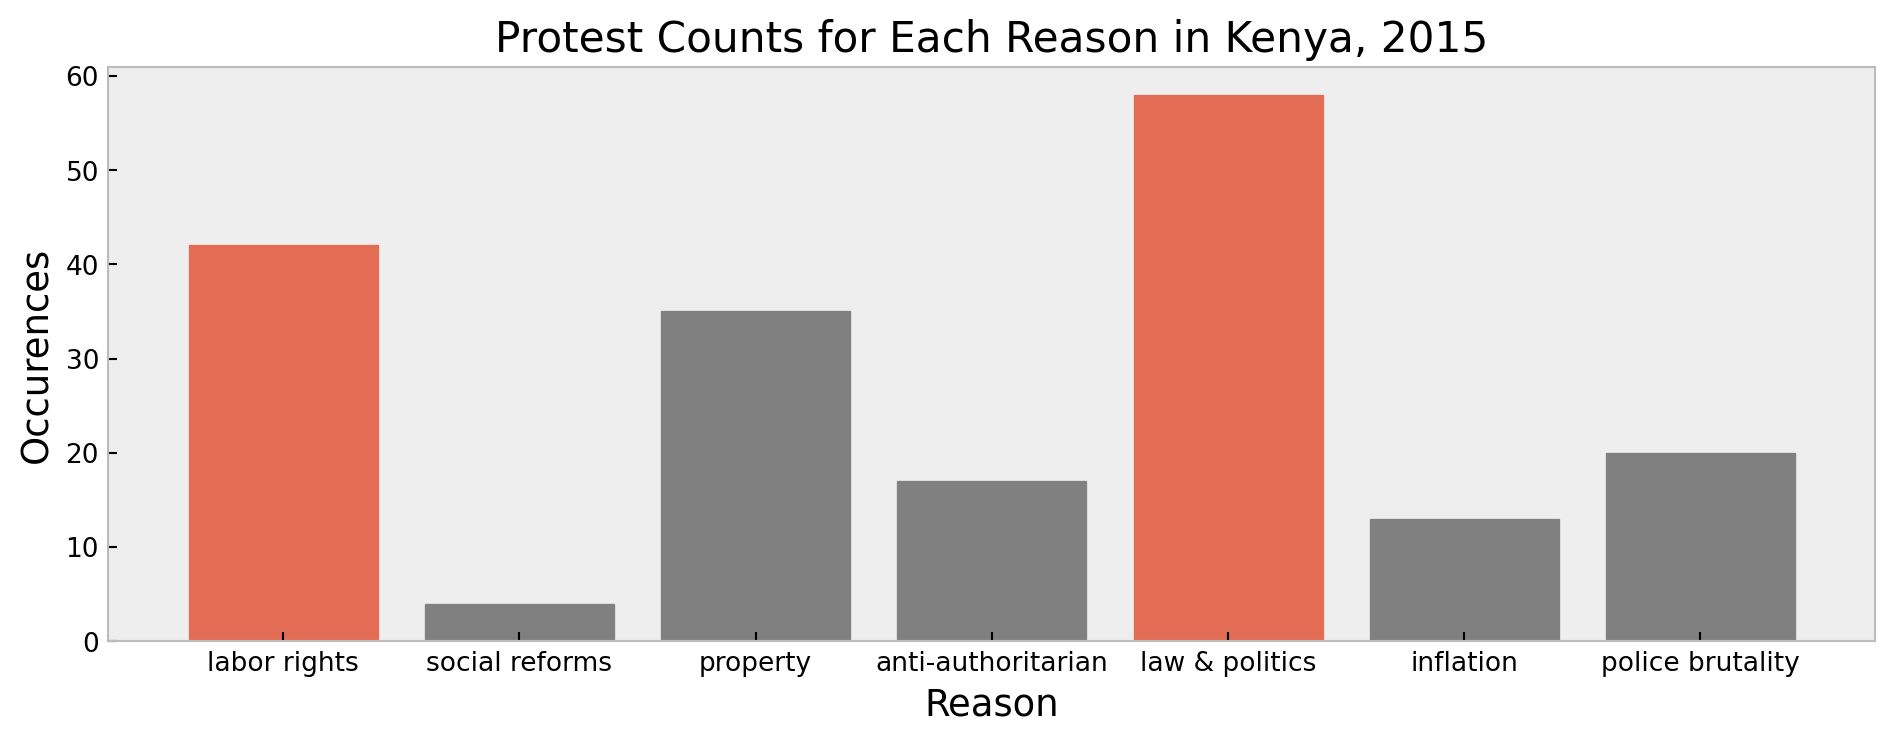

In [29]:
# Plotting dimensions
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize = fig_dims, dpi=190)

# Plotting
values = df_reasons['Total Protests']
clrs = ['grey' if (x < max(values)) else '#e36c55' for x in values]

mybar = plt.bar(df_reasons['Reason'], df_reasons['Total Protests'])
for bar in mybar:
    bar.set_color("grey")
mybar[0].set_color('#e36c55')
mybar[4].set_color('#e36c55')
                           
plt.xlabel('Reason', size = 14)
plt.ylabel('Occurences', size = 14)
plt.title('Protest Counts for Each Reason in Kenya, 2015', size = 16)
plt.grid(False)

None

In [30]:
list_reasons = ['reasons_social', 'reasons_policebrutality','reasons_land', 'reasons_political', 'reasons_labor','reasons_price', 'reasons_removal']
s_Idx = data['success']>0
labels = ['social reforms', 'police brutality', 'property', 'law & politics', 'labor rights','inflation', 'anti-authoritarian']
s_dist = []
for reason in list_reasons:
    Idx = data[reason]>0
    s_dist.append(sum(Idx&s_Idx)/sum(Idx)*100)   

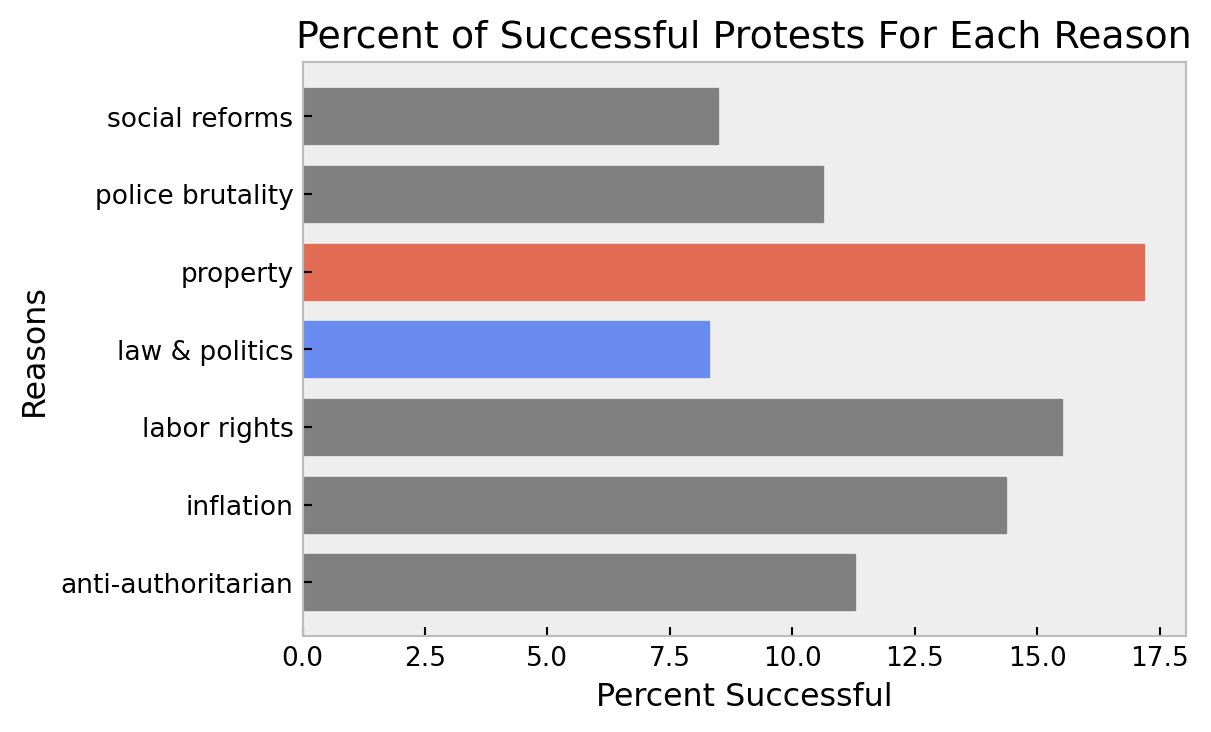

In [31]:
fig, ax = plt.subplots(figsize=(6,4), dpi=190)

y_pos = np.arange(len(labels))
y_pos = np.linspace(0, 2.5, len(labels))

mybars = ax.barh(y_pos, s_dist, align='center', height=0.3, color=(0.2, 0.4, 0.6, 0.6))
for bar in mybars:
    bar.set_color('grey')
mybars[2].set_color('#E36C55')
mybars[3].set_color('#6a8bef')

ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent Successful')
ax.set_ylabel('Reasons')
ax.set_title("Percent of Successful Protests For Each Reason")
#plt.xlim([0, 100])
plt.grid(False)

In [32]:
list_d = [(0,1),(1,7),(7,30),(30,365),(365,7000)]
s_Idx = data['success']>0
labels = ['0-1 day','1-7 days','7-30 days','30-365 days','>1 year']
s_dist = []
for a,b in list_d:
    Idx1 = data['protest_time']>a
    Idx2 = data['protest_time']<=b
    s_dist.append(sum(Idx1&Idx2&s_Idx)/sum(Idx1&Idx2)*100)   

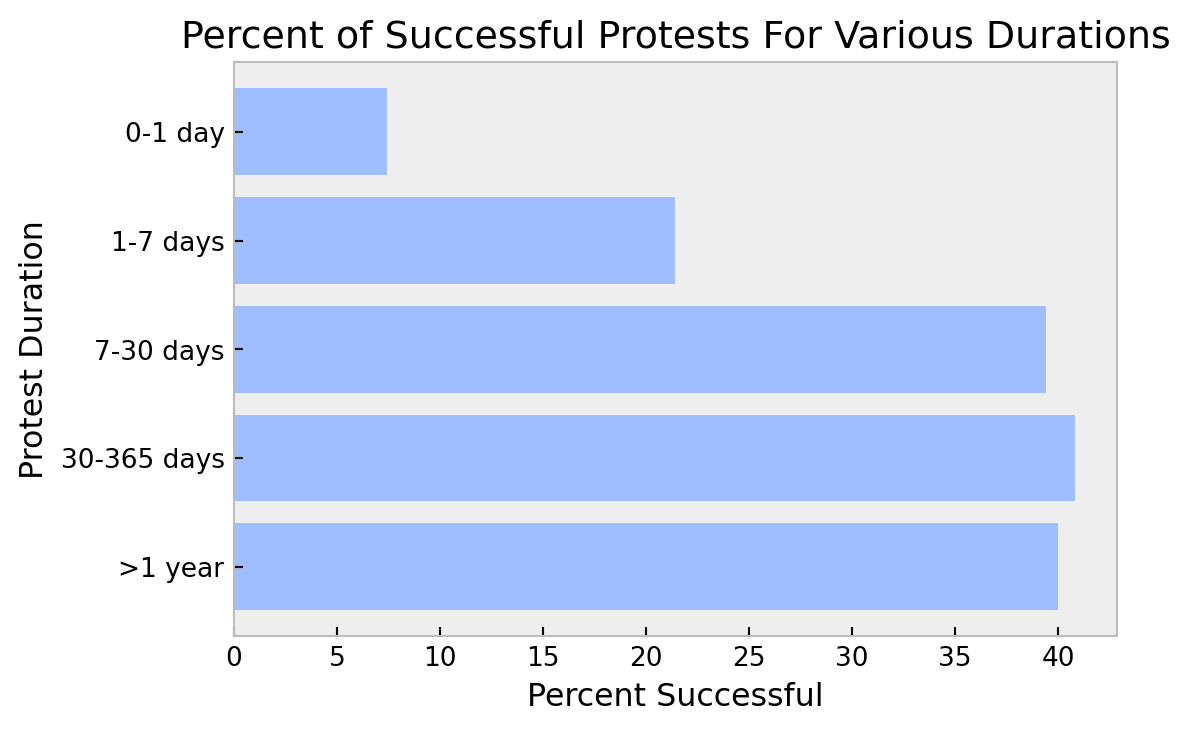

In [33]:
fig, ax = plt.subplots(figsize=(6,4),dpi=190)

y_pos = np.arange(len(labels))
y_pos = np.linspace(0, 1.5, len(labels))

col = plt.get_cmap('coolwarm')(np.linspace(0.3, 0.3, len(labels)+1))
mybars = ax.barh(y_pos, s_dist, align='center', height=0.3, color=col)

    
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent Successful')
ax.set_ylabel('Protest Duration')
ax.set_title("Percent of Successful Protests For Various Durations")

plt.grid(False)

plt.show()

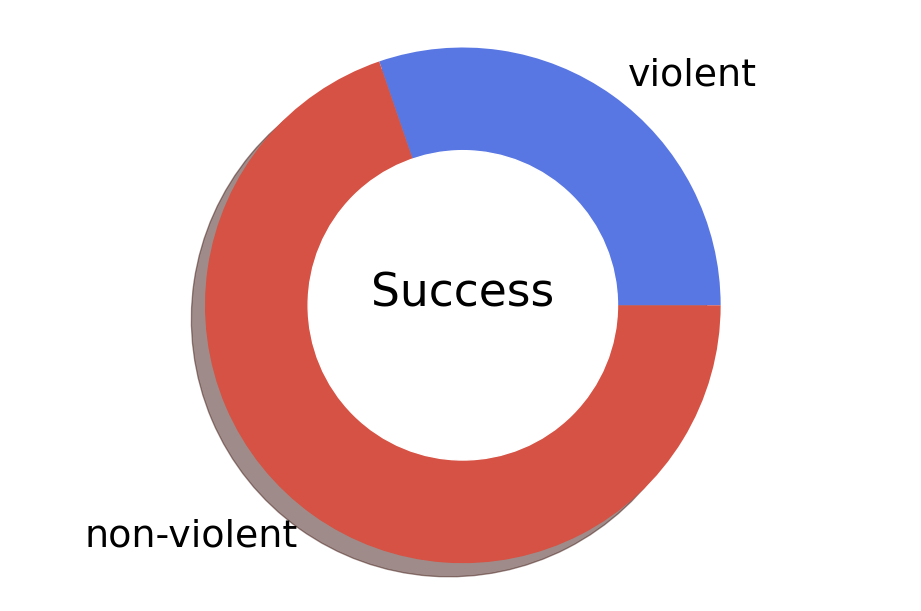

In [34]:
Idx = data['success']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(6,4), dpi=190)

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Success', ha='center', fontsize='xx-large')
plt.show()

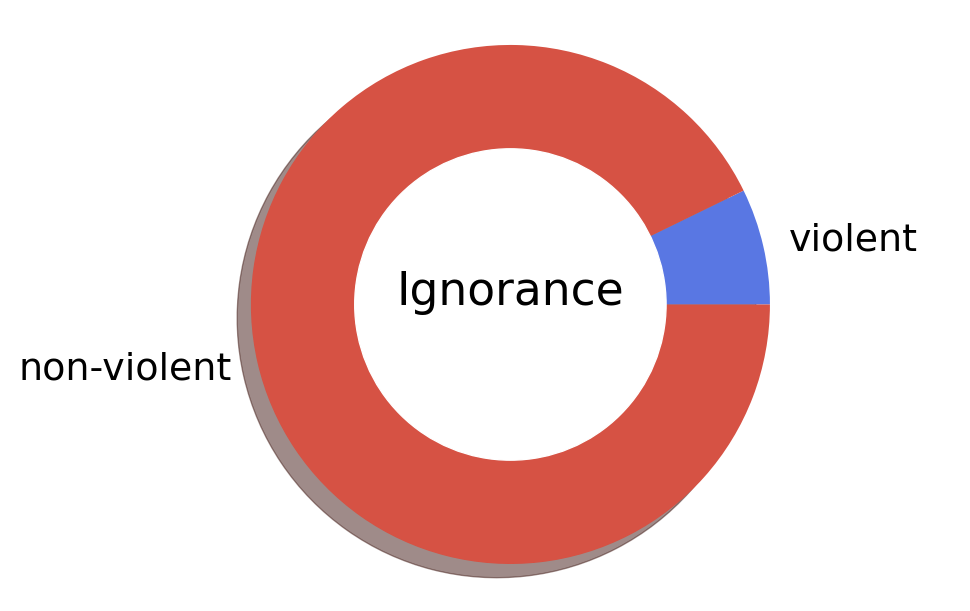

In [35]:
Idx = data['responses_ignore']>0
v_Idx = data['violence_both']>0

sizes = [sum(v_Idx & Idx)/sum(Idx)*100, 100-sum(v_Idx & Idx)/sum(Idx)*100]

labels = ['violent', 'non-violent']
tmp = plt.get_cmap('coolwarm')(
        np.linspace(0.1, 0.9, len(labels)))

plt.figure(figsize=(6,4), dpi=190)

plt.pie(sizes, labels=labels, shadow=True, colors=tmp, textprops={'fontsize': 'x-large'})
plt.axis('equal')
my_circle=plt.Circle( (0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.text(0, 0, 'Ignorance', ha='center', fontsize='xx-large')
plt.show()